In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import make_pipeline,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [3]:
laptop_data=pd.read_csv("laptop_price.csv",encoding="latin-1")

In [4]:
laptop_data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [5]:
len(laptop_data["Inches"].unique())

18

In [6]:
laptop_data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
laptop_data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [9]:
# #testing
# def transformer(dataset):
#     encoder=OrdinalEncoder(dtype=int)
#     wt=[]
#     ram=[]
#     x_res=[]
#     y_res=[]
#     all_res=[]
#     scrn_type=[]
#     cpu_freq=[]
#     cpu_type=[]
#     for i in list(dataset.columns):
#         X=dataset[i]
#         if i=='Weight':
#             for j in X:
#                 wt.append(float(j.split("kg")[0]))
#             dataset.drop("Weight",axis=1,inplace=True)
#             dataset["Weight(kg)"]=wt
        
#         elif i=="Ram":
#             for j in X:
#                 ram.append(int(j.split("GB")[0]))
            
#             dataset.drop("Ram",axis=1,inplace=True)
#             dataset["Ram(GB)"]=ram
    
#         elif i=="ScreenResolution":
#             most_freq=X.value_counts().keys()[0]
#             for j in X.values:
#                 temp=re.search(r"(\d{3,4}x\d{3,4})",j).group()
#                 temp2=j.split(temp)
#                 temp=temp.split('x')
#                 if temp2[0]=='':
#                     scrn_type.append(most_freq)
#                     x_res.append(int(temp[0]))
#                     y_res.append(int(temp[1]))
#                     all_res.append([most_freq,int(temp[0]),int(temp[1])])
#                 else:
#                     scrn_type.append(temp2[0])
#                     x_res.append(int(temp[0]))
#                     y_res.append(int(temp[1]))
#                     all_res.append([temp2[0],int(temp[0]),int(temp[1])])
#             dataset["X_Res"]=x_res
#             dataset["Y_Res"]=y_res
#             dataset["Screen_type"]=scrn_type
#             dataset.drop("ScreenResolution",axis=1,inplace=True)
#         elif i=="Cpu":
#             for j in X.values:
#                 temp=re.search(r'(\d{1}.\d{0,2}GHz)',j)
#                 if temp:
#                     temp0=re.split(r'(\d{1}.\d{0,2}GHz)',j)[0]
#                     temp=temp.group().split('GHz')[0]
#                     if re.search(r'(\d \d)',temp):
#                         temp=temp.split(" ")[1]
#                         cpu_freq.append(float(temp))
#                     else:
#                         cpu_freq.append(float(temp))
                
#                     cpu_type.append(temp0)
#                 else:

#                     temp0=re.split(r'(\d{1}GHz)',j)[0]
#                     temp=re.search(r'(\d{1}GHz)',j).group().split('GHz')[0]
#                     cpu_freq.append(float(temp))
#                     cpu_type.append(temp0)
#             dataset.drop("Cpu",axis=1,inplace=True)
#             dataset["Cpu_freq(GHz)"]=cpu_freq
#             dataset["Cpu_type"]=cpu_type
#         elif i not in ["Ram",'Cpu',"Weight","ScreenResolution","Price_euros","Inches"]:
#             dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))   
#     dataset["Screen_type"]   =dataset["Screen_type"].replace(to_replace= dataset["Screen_type"] .unique(),value=range(len( dataset["Screen_type"] .unique())))
#     dataset["Cpu_type"]   =dataset["Cpu_type"].replace(to_replace= dataset["Cpu_type"] .unique(),value=range(len( dataset["Cpu_type"] .unique())))

    
            
#     return dataset

In [68]:
from sklearn.base import TransformerMixin, BaseEstimator
class Transformer(TransformerMixin,BaseEstimator):
    def __init__(self):
        self.wt=[]
        self.ram=[]
        self.x_res=[]
        self.y_res=[]
        self.all_res=[]
        self.scrn_type=[]
        self.cpu_freq=[]
        self.cpu_type=[]
    def fit(self,dataset,y=None):
        encoder=OrdinalEncoder(dtype=int)
        self.dataset=dataset
        for i in list(dataset.columns):
            X=dataset[i]
            if i=='Weight':
                for j in X:
                    self.wt.append(float(j.split("kg")[0]))
        
            elif i=="Ram":
                for j in X:
                    self.ram.append(int(j.split("GB")[0]))
            
            
    
            elif i=="ScreenResolution":
                most_freq=X.value_counts().keys()[0]
                for j in X.values:
                    temp=re.search(r"(\d{3,4}x\d{3,4})",j).group()
                    temp2=j.split(temp)
                    temp=temp.split('x')
                    if temp2[0]=='':
                        self.scrn_type.append(most_freq)
                        self.x_res.append(int(temp[0]))
                        self.y_res.append(int(temp[1]))
                        self.all_res.append([most_freq,int(temp[0]),int(temp[1])])
                    else:
                        self.scrn_type.append(temp2[0])
                        self.x_res.append(int(temp[0]))
                        self.y_res.append(int(temp[1]))
                        self.all_res.append([temp2[0],int(temp[0]),int(temp[1])])
            
            elif i=="Cpu":
                for j in X.values:
                    temp=re.search(r'(\d{1}.\d{0,2}GHz)',j)
                    if temp:
                        temp0=re.split(r'(\d{1}.\d{0,2}GHz)',j)[0]
                        temp=temp.group().split('GHz')[0]
                        if re.search(r'(\d \d)',temp):
                            temp=temp.split(" ")[1]
                            self.cpu_freq.append(float(temp))
                        else:
                            self.cpu_freq.append(float(temp))
                
                        self.cpu_type.append(temp0)
                    else:
                        temp0=re.split(r'(\d{1}GHz)',j)[0]
                        temp=re.search(r'(\d{1}GHz)',j).group().split('GHz')[0]
                        self.cpu_freq.append(float(temp))
                        self.cpu_type.append(temp0)
            elif i not in ["Ram",'Cpu',"Weight","ScreenResolution","Price_euros","Inches"]:
                self.dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique()))) 
        return self
    
    def transform(self,dataset):
        self.dataset.drop("Ram",axis=1,inplace=True)
        self.dataset["Ram(GB)"]=self.ram
        self.dataset.drop("Cpu",axis=1,inplace=True)
        self.dataset["Cpu_freq(GHz)"]=self.cpu_freq
        self.dataset["Cpu_type"]=self.cpu_type
        self.dataset["X_Res"]=self.x_res
        self.dataset["Y_Res"]=self.y_res
        self.dataset["Screen_type"]=self.scrn_type
        self.dataset.drop("ScreenResolution",axis=1,inplace=True)
        self.dataset["Screen_type"]   = self.dataset["Screen_type"].replace(to_replace= self.dataset["Screen_type"] .unique(),value=range(len( self.dataset["Screen_type"] .unique())))
        self.dataset["Cpu_type"]   = self.dataset["Cpu_type"].replace(to_replace= self.dataset["Cpu_type"] .unique(),value=range(len( self.dataset["Cpu_type"] .unique())))
        self.dataset.drop("Weight",axis=1,inplace=True)
        self.dataset["Weight(Kg)"]=self.wt
        return self.dataset
       

    
            


In [11]:
to_check=laptop_data.copy()

In [12]:
features=to_check.drop("Price_euros",axis=1)
label=to_check["Price_euros"]

In [13]:
to_check.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [14]:
transformer=Transformer()
transformer.fit_transform(to_check)

/tmp/ipykernel_1333980/1151897555.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_1333980/1151897555.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataset[i]=X.replace(to_replace=X.unique(),value=range(len(X.unique())))
/tmp/ipykernel_1333980/1151897555.py:76: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obj

,laptop_ID,Company,Product,TypeName,Inches,Memory,Gpu,OpSys,Price_euros,Ram(GB),Cpu_freq(GHz),Cpu_type,X_Res,Y_Res,Screen_type,Weight(Kg)
0,0,0,0,0,13.3,0,0,0,1339.69,8,2.3,0,2560,1600,0,1.37
1,1,0,1,0,13.3,1,1,0,898.94,8,1.8,0,1440,900,1,1.34
2,2,1,2,1,15.6,2,2,1,575.00,8,2.5,1,1920,1080,2,1.86
3,3,0,0,0,15.4,3,3,0,2537.45,16,2.7,2,2880,1800,0,1.83
4,4,0,0,0,13.3,2,4,0,1803.60,8,3.1,0,2560,1600,0,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,5,615,4,14.0,0,9,2,638.00,4,2.5,34,1920,1080,4,1.80
1299,1299,5,404,4,13.3,3,9,2,1499.00,16,2.5,34,3200,1800,16,1.30
1300,1300,5,342,1,14.0,10,20,2,229.00,2,1.6,68,1366,768,1,1.50
1301,1301,1,616,1,15.6,6,101,2,764.00,6,2.5,34,1366,768,1,2.19


In [15]:
num_features=to_check.drop(columns=['laptop_ID', 'Company', 'Product', 'TypeName', 'Memory',
       'Gpu', 'OpSys','Cpu_type',"Screen_type"])

In [16]:
num_features.corr()["Price_euros"]

Inches           0.068197
Price_euros      1.000000
Ram(GB)          0.743007
Cpu_freq(GHz)    0.430293
X_Res            0.556529
Y_Res            0.552809
Weight(Kg)       0.210370
Name: Price_euros, dtype: float64

array([[<Axes: xlabel='Inches', ylabel='Inches'>,
        <Axes: xlabel='Price_euros', ylabel='Inches'>,
        <Axes: xlabel='Ram(GB)', ylabel='Inches'>,
        <Axes: xlabel='Cpu_freq(GHz)', ylabel='Inches'>,
        <Axes: xlabel='X_Res', ylabel='Inches'>,
        <Axes: xlabel='Y_Res', ylabel='Inches'>,
        <Axes: xlabel='Weight(Kg)', ylabel='Inches'>],
       [<Axes: xlabel='Inches', ylabel='Price_euros'>,
        <Axes: xlabel='Price_euros', ylabel='Price_euros'>,
        <Axes: xlabel='Ram(GB)', ylabel='Price_euros'>,
        <Axes: xlabel='Cpu_freq(GHz)', ylabel='Price_euros'>,
        <Axes: xlabel='X_Res', ylabel='Price_euros'>,
        <Axes: xlabel='Y_Res', ylabel='Price_euros'>,
        <Axes: xlabel='Weight(Kg)', ylabel='Price_euros'>],
       [<Axes: xlabel='Inches', ylabel='Ram(GB)'>,
        <Axes: xlabel='Price_euros', ylabel='Ram(GB)'>,
        <Axes: xlabel='Ram(GB)', ylabel='Ram(GB)'>,
        <Axes: xlabel='Cpu_freq(GHz)', ylabel='Ram(GB)'>,
        <Axes: x

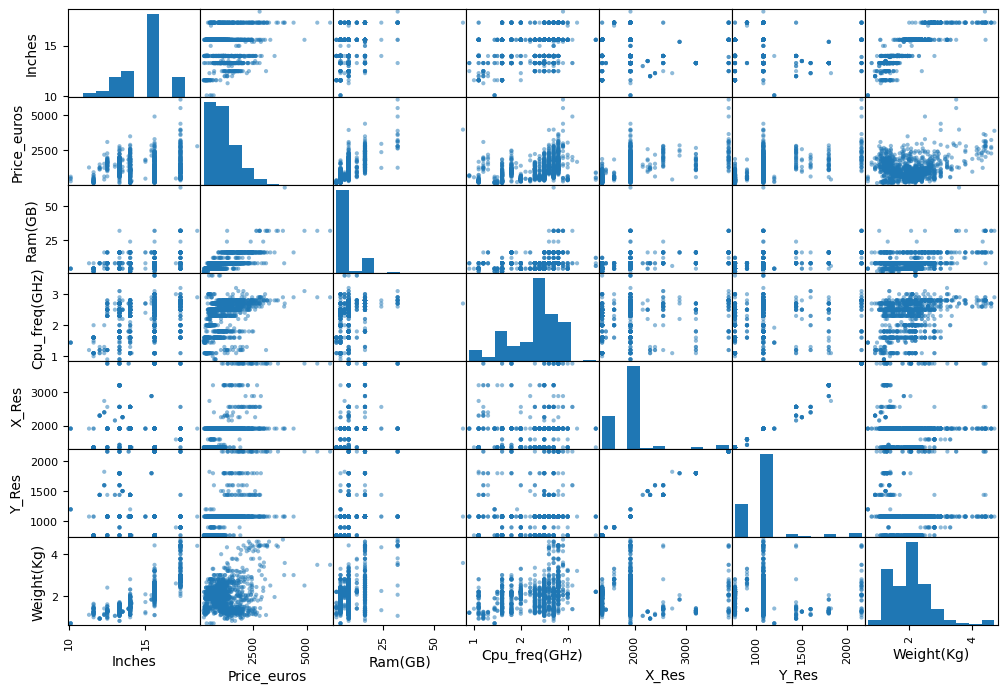

In [17]:

scatter_matrix(num_features,figsize=(12,8))

In [18]:
laptop_data["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company', ylabel='count'>

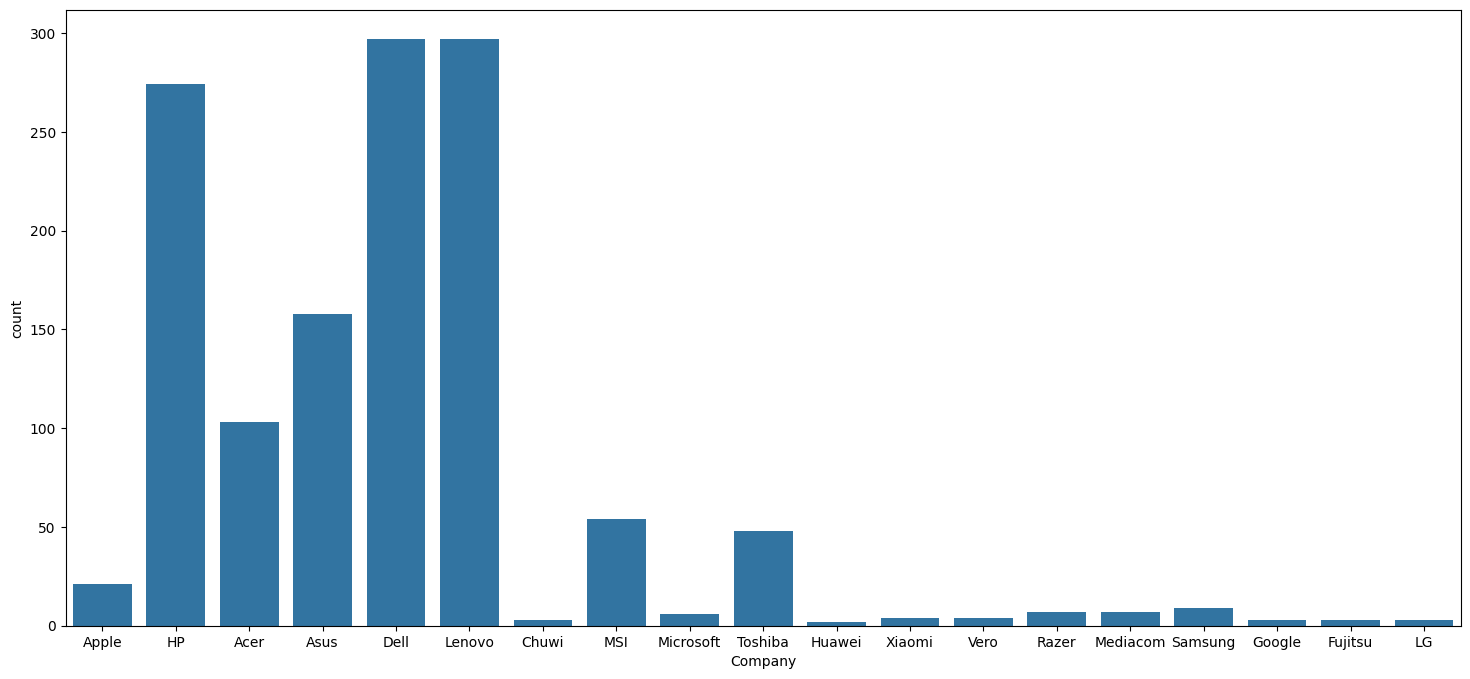

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(data=laptop_data,x="Company")

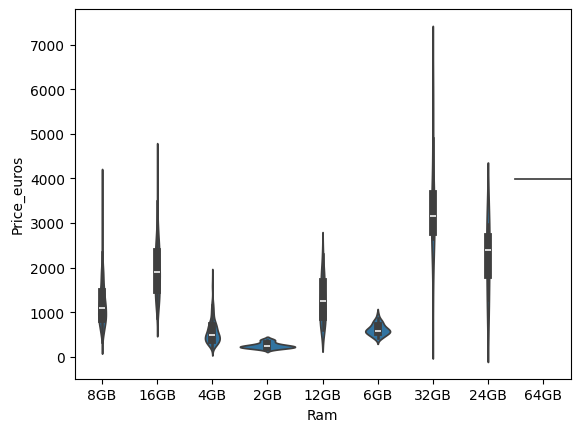

In [20]:
sns.violinplot(data=laptop_data,x="Ram",y="Price_euros",width=1)
plt.show()

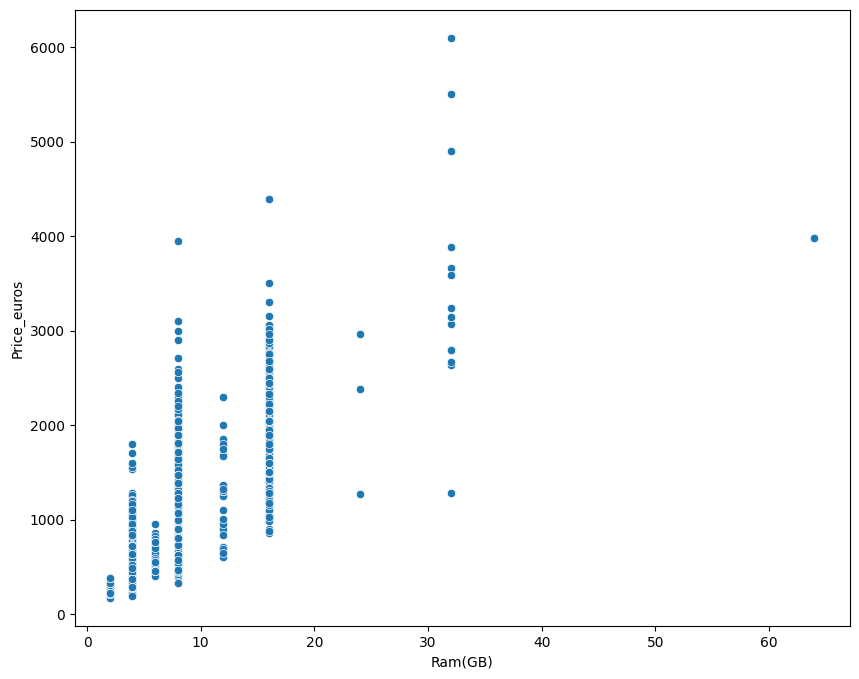

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=to_check,x="Ram(GB)",y="Price_euros")
plt.show()

In [22]:
to_check["Y_Res"]

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_Res, Length: 1303, dtype: int64

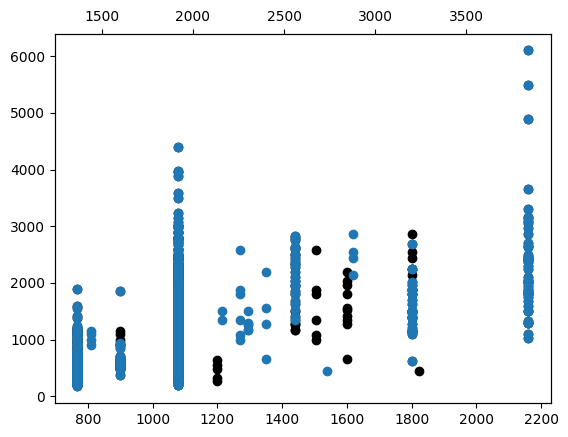

In [23]:
x1=plt.subplot()
x2=plt.twiny()
x2.scatter(to_check["X_Res"],to_check["Price_euros"])
x1.scatter(to_check["Y_Res"],to_check["Price_euros"],color="black")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
features=to_check.drop("Price_euros",axis=1)
label=to_check["Price_euros"]

In [26]:
# train_features

In [27]:
stratify=['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Memory',
       'Gpu', 'OpSys', 'X_Res', 'Y_Res', 'Screen_type',
       'Cpu_freq(GHz)', 'Cpu_type', 'Ram(GB)', 'Weight(kg)']

In [28]:
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
class ClusterClone(TransformerMixin,BaseEstimator):
    def __init__(self,n_clusters=10,gamma=1,random_state=42):
        self.n_clusters=n_clusters
        self.gamma= gamma
        self.random_state= random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans=KMeans(n_clusters=self.n_clusters)
        self.kmeans.fit(X,sample_weight=sample_weight)
        return self
    def transform(self,X):
        return rbf_kernel(X,self.kmeans.cluster_centers_,gamma=self.gamma,)
    def get_feature_names_out(self,names=None):
        return [f"{i} cluster similarity" for i in self.kmeans.cluster_centers_]




In [29]:
cluster=ClusterClone()
simil=cluster.fit_transform(to_check[["Ram(GB)","Cpu_freq(GHz)"]],sample_weight=to_check["Price_euros"])


In [30]:
to_check["Gpu_max_similarity"]=simil.max(axis=1)

/tmp/ipykernel_1333980/741035725.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


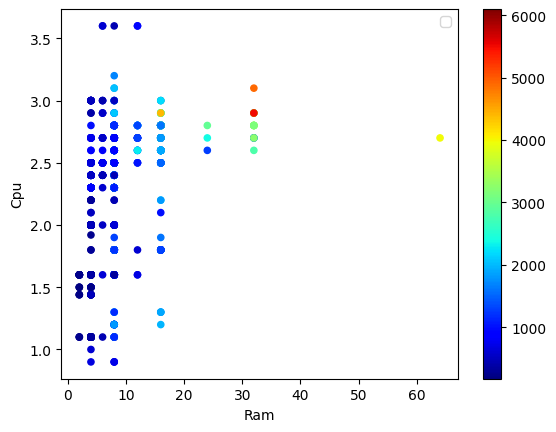

In [31]:
to_check.plot(kind="scatter",x="Ram(GB)",y="Cpu_freq(GHz)",c=to_check["Price_euros"],cmap="jet",)
plt.xlabel("Ram")
plt.ylabel("Cpu")
plt.get_cmap()
plt.legend()

In [32]:
res_simil=cluster.fit_transform(to_check[["X_Res","Y_Res"]],sample_weight=to_check["Price_euros"])
to_check["Resolution_max_similarity"]=res_simil.max(axis=1)

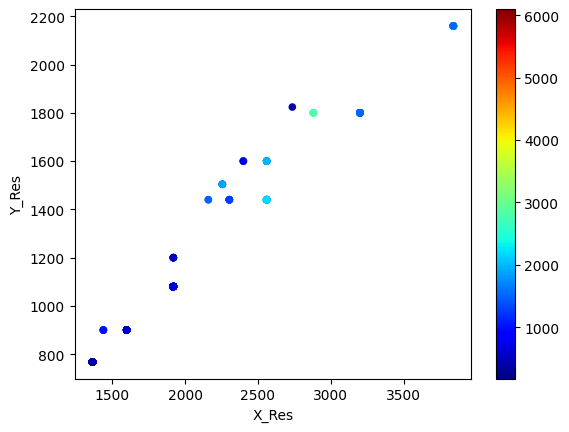

In [33]:
to_check.plot(kind="scatter",x="X_Res",y="Y_Res",c=to_check["Price_euros"],cmap="jet")
plt.show()

<Axes: xlabel='Screen_type', ylabel='Count'>

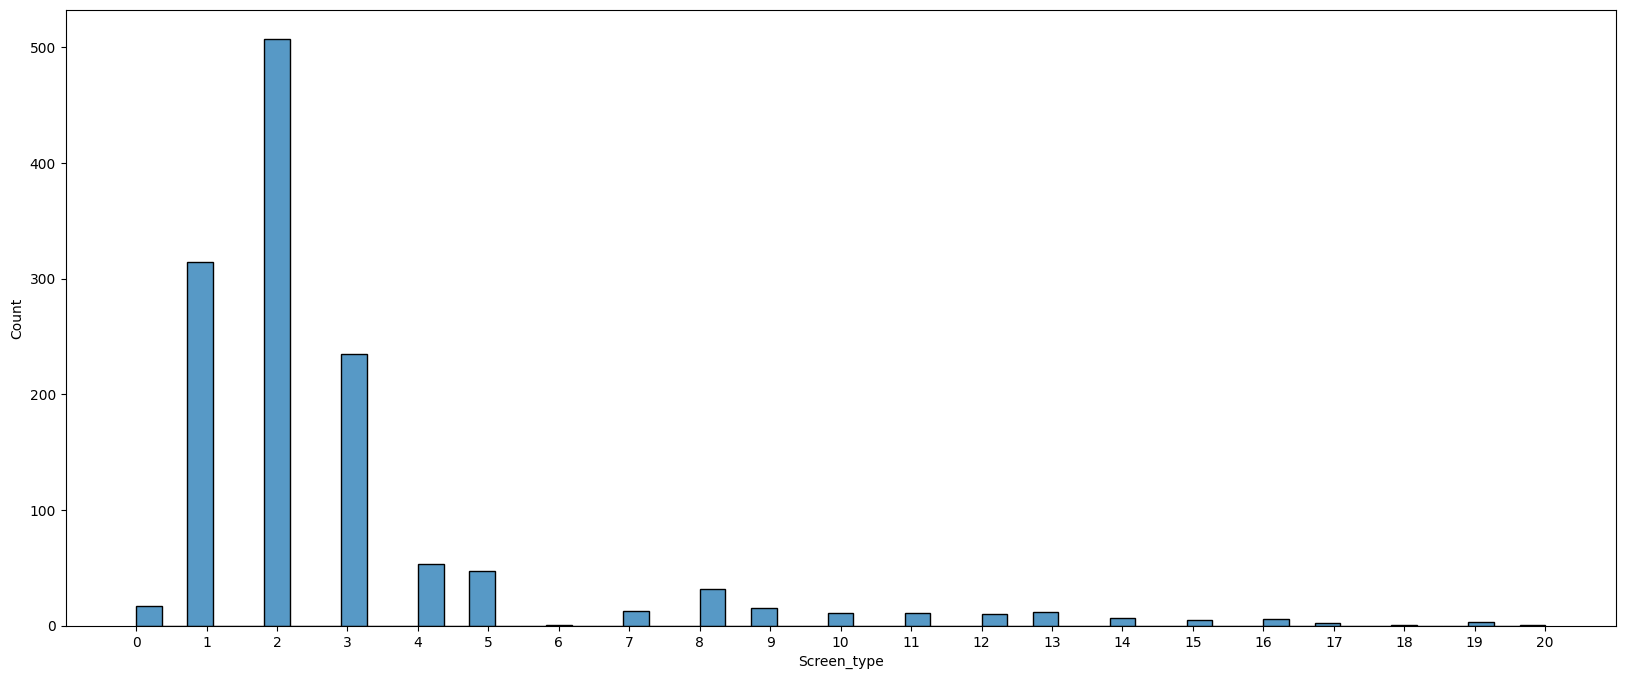

In [34]:
plt.figure(figsize=(20,8))
plt.xticks(to_check["Screen_type"].unique())
sns.histplot(data=to_check,x="Screen_type")

In [35]:
laptop_data["Company"].value_counts().keys()

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei'],
      dtype='object', name='Company')

([<matplotlib.patches.Wedge at 0x793702796570>,
 [Text(0.7543843332739008, 0.6564329955988595, 'Dell'),
  Text(-0.5458854117093117, 0.8378598434600832, 'Lenovo'),
  Text(-0.9274144688226601, -0.3740352964873546, 'HP'),
  Text(-0.14535145790458645, -0.9893800855510542, 'Asus'),
  Text(0.46480534224008946, -0.885412894544163, 'Acer'),
  Text(0.7591126798082852, -0.6509592455402133, 'MSI'),
  Text(0.8947520250994075, -0.44656333658341146, 'Toshiba'),
  Text(0.9563478422609858, -0.29223073863431376, 'Apple'),
  Text(0.9749662341135263, -0.22235296791023162, 'Samsung'),
  Text(0.982816392796901, -0.18458585549734707, 'Razer'),
  Text(0.9884859934310255, -0.1513123947027427, 'Mediacom'),
  Text(0.9927423763868652, -0.12026044289690417, 'Microsoft'),
  Text(0.9953530961425346, -0.09629233614089029, 'Xiaomi'),
  Text(0.9970251524041153, -0.0770768802790478, 'Vero'),
  Text(0.9981839469195978, -0.060239589241740464, 'Chuwi'),
  Text(0.9989509142624753, -0.04579378663273833, 'Google'),
  Text(0.

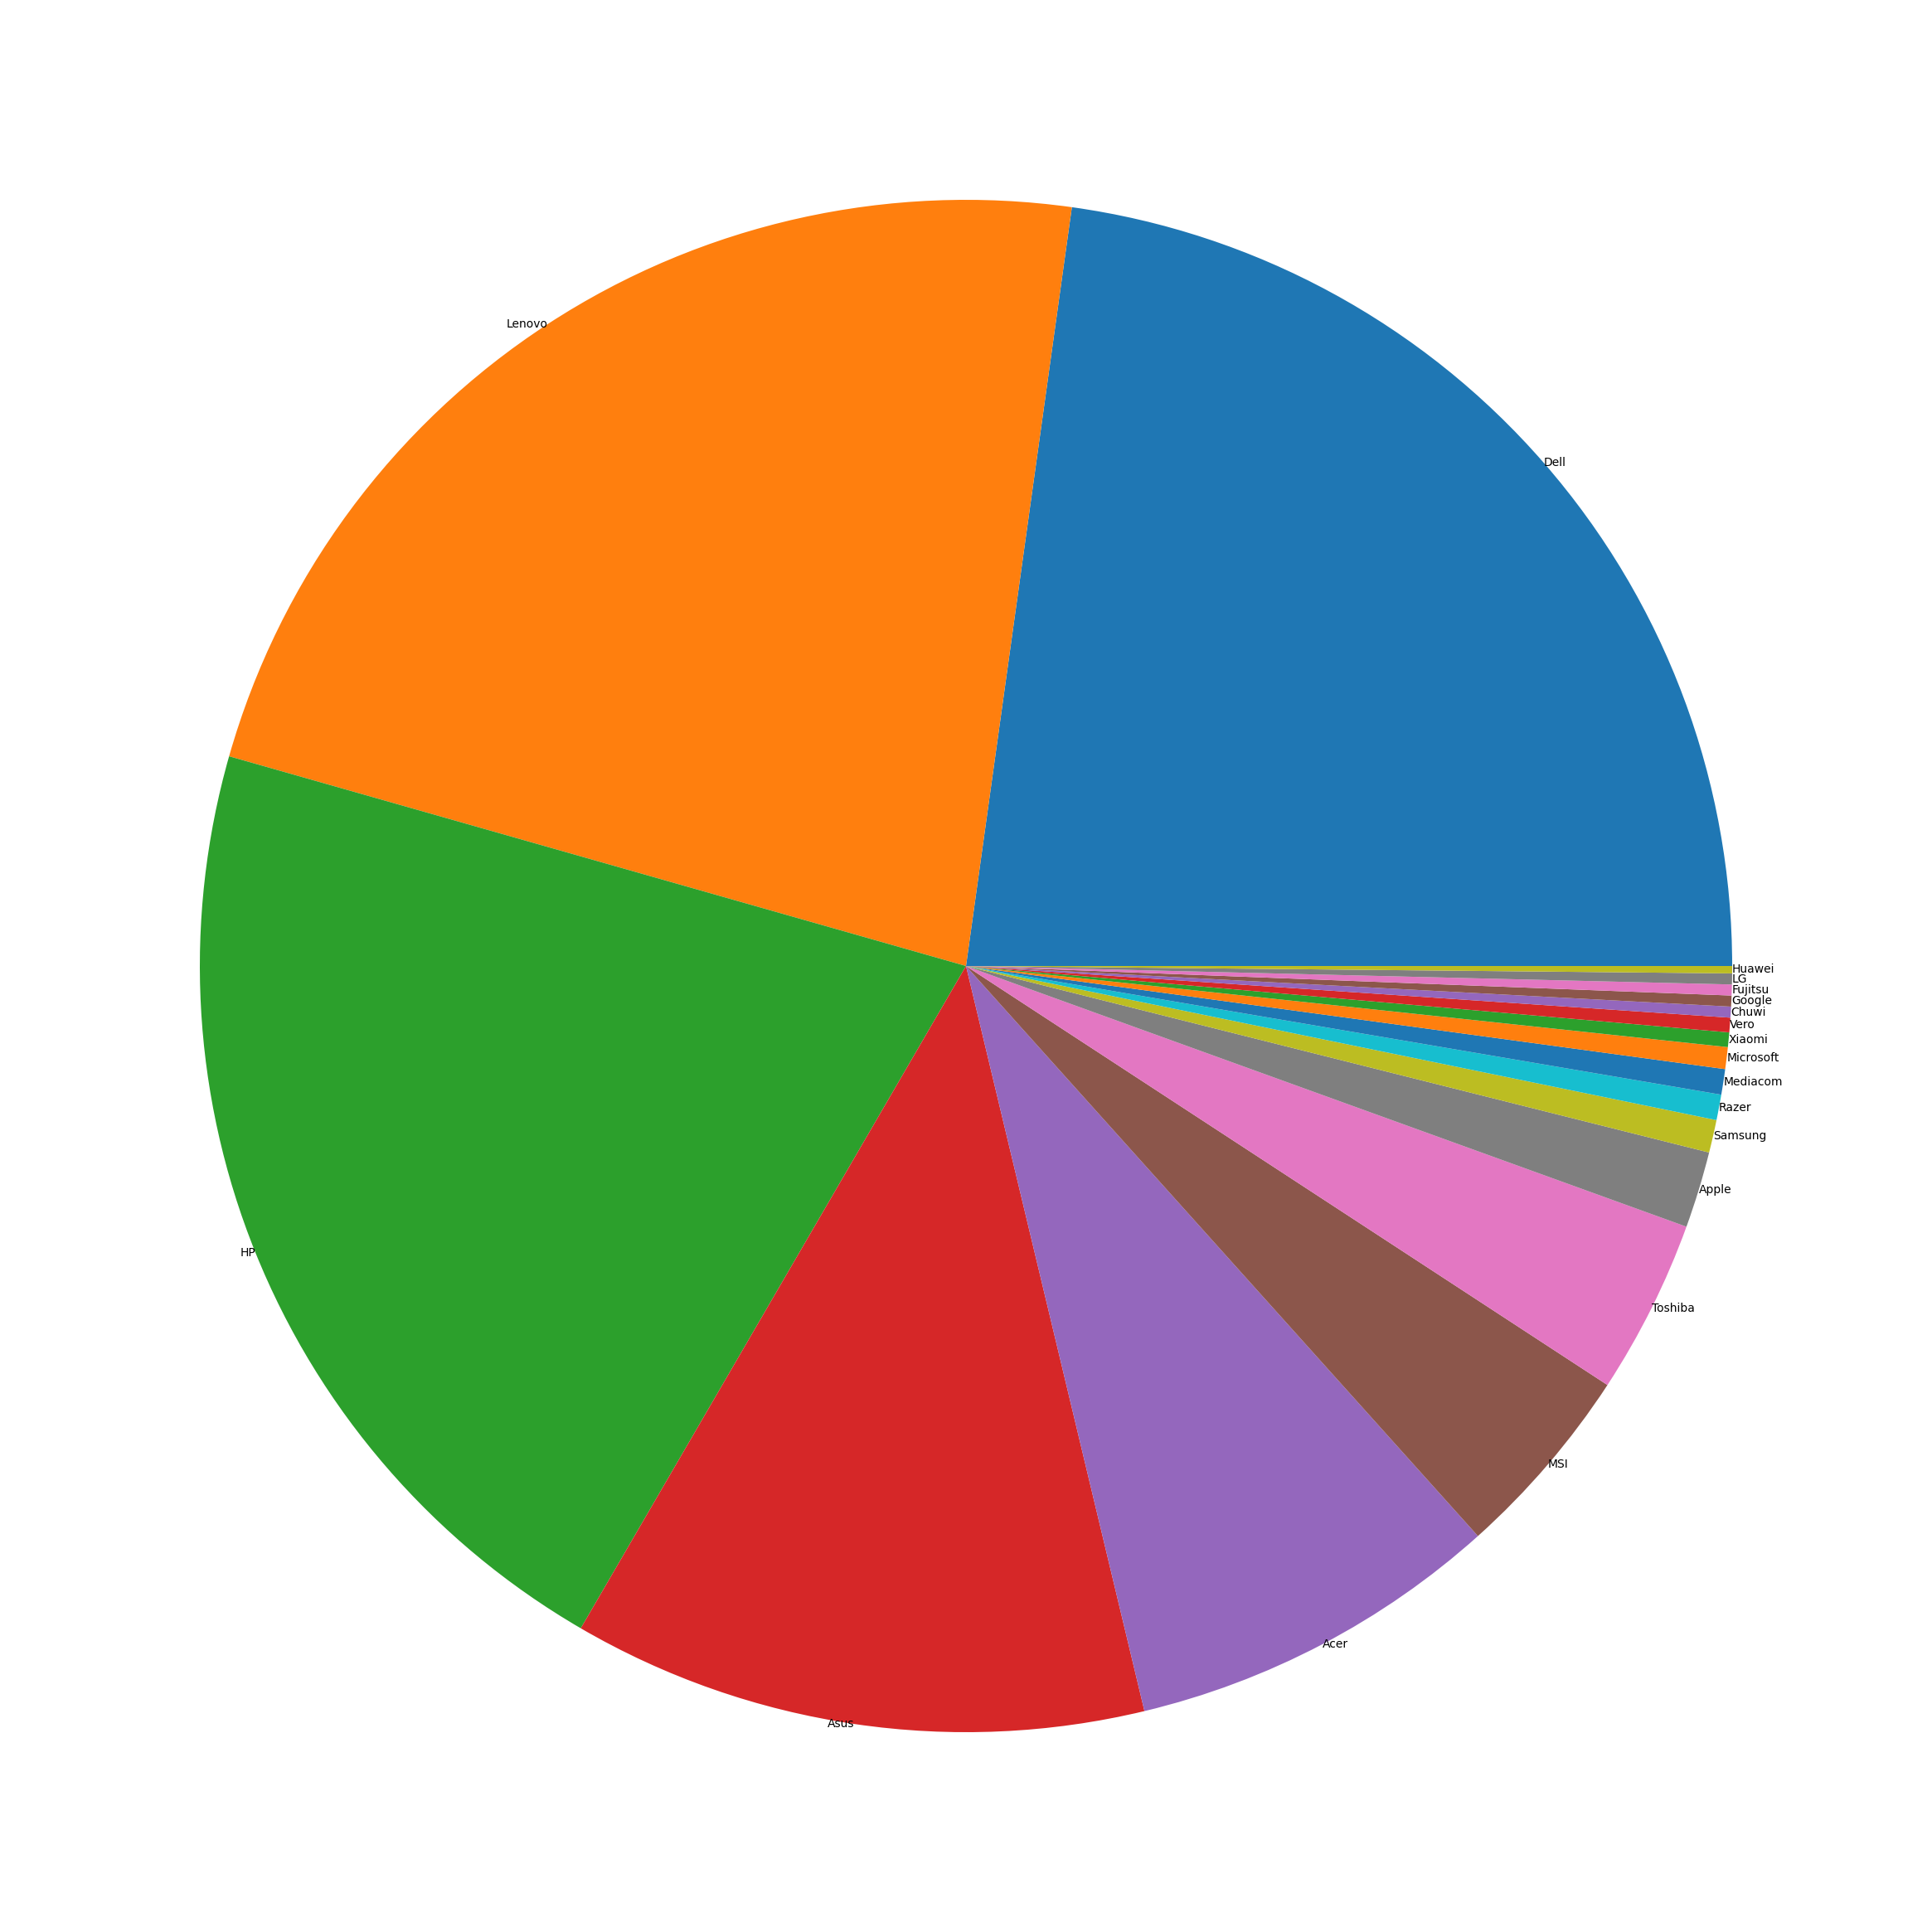

In [36]:
plt.figure(figsize=(30,30))
plt.pie(x=laptop_data["Company"].value_counts(),labels=laptop_data["Company"].value_counts().keys(),labeldistance=1)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
RFR= RandomForestRegressor()
param={
 "n_estimators":  randint(10,50),
    "criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    "max_depth":  randint(2,10),
    "min_samples_split": randint(2,10),
    "min_samples_leaf": randint(1,5),
    "max_features":  randint(1,10)

}
RS= RandomizedSearchCV(estimator=RFR,param_distributions=param,cv=3,n_iter=10,scoring="neg_root_mean_squared_error")


In [38]:
features.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Memory',
       'Gpu', 'OpSys', 'Ram(GB)', 'Cpu_freq(GHz)', 'Cpu_type', 'X_Res',
       'Y_Res', 'Screen_type', 'Weight(Kg)'],
      dtype='object')

In [39]:
trainx,testx,trainy,testy=train_test_split(features,label,test_size=0.2)

In [40]:
trainy

1130     629.0
844     1870.0
886      455.7
492     1350.0
1291     289.0
         ...  
94      1049.0
813      961.0
17      2858.0
244     1079.0
784     2299.0
Name: Price_euros, Length: 1042, dtype: float64

In [41]:
RS.fit(trainx,trainy)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701d34ce0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701db67e0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701db5730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793702797470>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79370cf14f80>},
                   scoring='neg_root_mean_squared_error')

In [42]:
from sklearn.metrics import mean_squared_error
pred=RS.best_estimator_.predict(testx)
from scipy import stats
confidence= 0.95
squared_errors= (pred-testy)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))).mean()


238.1376077219281

In [43]:
RS.best_params_

{'criterion': 'absolute_error',
 'max_depth': 9,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 42}

In [44]:
RS.score(testx,testy)

-239.6480259383138

In [45]:
max=testy.max()
min=testy.min()

In [46]:
print(f"Accuracy for Random_forest={(1-(-RS.best_score_/(max-min)))*100} %")

Accuracy for Random_forest=89.47065314936545 %


In [47]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
param ={
    "n_neighbors": randint(5,15),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": randint(10,60),
    "n_jobs": randint(5,20),
    "p": randint (1,10)
}
RSK=RandomizedSearchCV(KNN,param,cv=3,n_iter=10,scoring="neg_root_mean_squared_error")

In [49]:
RSK.fit(trainx,trainy)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701de8ec0>,
                                        'n_jobs': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701dea4e0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701d0fad0>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701de81d0>,
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_root_mean_squared_error')

In [50]:
RSK.best_score_

-520.1029642454308

In [51]:
pred=RSK.best_estimator_.predict(testx)

In [52]:
squared_errors= (testy-pred)**2
confidence = 0.95
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))).mean()

436.29889830303495

In [53]:
print(f"Accuracy for KNN regressor={(1-(-RSK.best_score_/(max-min)))*100} %")

Accuracy for KNN regressor=83.03643299917056 %


In [54]:
from sklearn.svm import SVR
param ={
    "degree": randint(2,10),
    "gamma": ['scale', 'auto'] ,
    "tol": randint(0,5),
    "max_iter" : randint(1,20)
}
RSS=RandomizedSearchCV(SVR(),param,cv=3,n_iter=10,scoring="neg_root_mean_squared_error")

In [55]:
RSS.fit(trainx,trainy)

/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=19).  Consider pre-processing your data with StandardScaler or Min

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793701d0fa70>,
                                        'gamma': ['scale', 'auto'],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793700716570>,
                                        'tol': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793703123f80>},
                   scoring='neg_root_mean_squared_error')

In [56]:
RSS.score(testx,testy)

-767.1940441713404

In [57]:
pred=RSS.best_estimator_.predict(testx)

In [58]:
squared_errors= (pred-testy)**2
np.sqrt(stats.t.interval(0.95,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))).mean()

765.8865631682003

In [59]:
print(f"Accuracy for SVR={(1-(-RSS.best_score_/(max-min)))*100} %")


Accuracy for SVR=73.889820676212 %


In [60]:
laptop_data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [61]:
final_to_check=laptop_data.copy()

In [62]:
final_features=final_to_check.drop("Price_euros",axis=1)
final_label=final_to_check["Price_euros"]

In [63]:
final_label

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [64]:
final_trainx,final_testx,final_trainy,final_testy=train_test_split(final_features,final_label,test_size=0.2)

In [74]:
final_RFR=RandomForestRegressor(criterion='absolute_error', max_depth=9, max_features=6,
                      min_samples_leaf=2, min_samples_split=4, n_estimators=42)

In [75]:
final_RFR.fit(trainx,trainy)

RandomForestRegressor(criterion='absolute_error', max_depth=9, max_features=6,
                      min_samples_leaf=2, min_samples_split=4, n_estimators=42)

In [79]:
final_RFR.fit(trainx,trainy)

RandomForestRegressor(criterion='absolute_error', max_depth=9, max_features=6,
                      min_samples_leaf=2, min_samples_split=4, n_estimators=42)

In [80]:
pred=final_RFR.predict(testx)

In [81]:
squared_errors= (pred-testy)**2
np.sqrt(stats.t.interval(0.95,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))).mean()

240.70593631253033

In [76]:
import joblib
joblib.dump(final_RFR,'Finalmodel.pkl')

['Finalmodel.pkl']